【課題】CNNとはどういった手法なのか記述せよ   
CNNとはどういったものでしょうか。一般的なディープラーニングとの比較もしながら説明してください。   
    
答え： 一般的なディープラーニングの層は全結合層で構成される。    
そのため画像を入力するとピクセルの位置情報が消えてしまう課題がある。    
CNNでは全結合層の代わりに、畳み込み層やプーリング層を使うことで位置情報を考慮することができる。　　　

【課題】畳み込み層とプーリング層について記述せよ   
CNNにおける畳み込み層とプーリング層について説明してください。    
パディングとストライドとは何かということも含めてください。    
    
答え：   畳み込み層は元の画像にフィルタをかけて特徴マップを出力する。   
フィルタサイズにより画像の端が切れてしまうためパディングを行い、画像の周りを埋める処理を行う。例えば３x３フィルタの場合周り１画素を埋める。   
通常畳み込み演算ではストライド１（移動量１）ですが、ストライド２（移動量２）にすると画像サイズを小さくさせることができる。   
プーリング層は、入力画像を圧縮できる。微小な位置変化に影響を受け難くなる。過学習防止になる。計算コストを抑えられる等のメリットがある。   



In [1]:
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/Users/hagiwara/.pyenv/versions/3.6.0/envs/TensorFlow/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


【課題】データの読み込み   
MNIST同様にKerasでは簡単に読み込むことができます。以下のページを参考にCIFAR-10を読み込むコードを書いてください。   

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('x_train.shape : ',x_train.shape)
print('y_train.shape : ',y_train.shape)
print('x_test.shape : ',x_test.shape)
print('y_test.shape : ',y_test.shape)
print('y_test[0:10] : ',y_test[0:10])

x_train.shape :  (50000, 32, 32, 3)
y_train.shape :  (50000, 1)
x_test.shape :  (10000, 32, 32, 3)
y_test.shape :  (10000, 1)
y_test[0:10] :  [[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


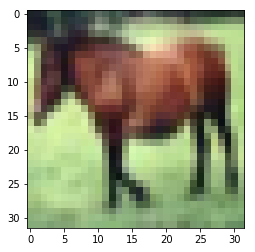

In [4]:
#指定したラベルのインデックスを取得する
tmp  = np.where(y_train==7)[0][0]

plt.imshow(x_train[tmp])

【課題】画像をまとめて表示   
どのようなデータセットなのか確認するために、10種類それぞれを10枚ずつ、合計100枚の画像を表示させてください。   
データセットの前から抜き出していけば以下のようになります。   

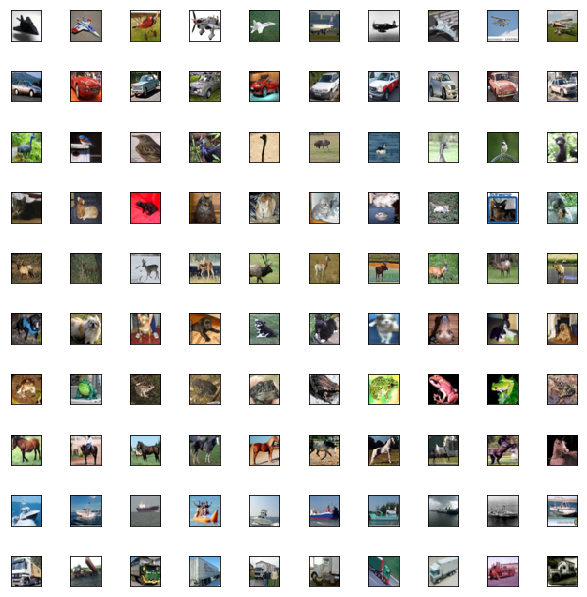

In [5]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
pos = 1
for j in range(10):
    targets  = np.where(y_train==j)[0]
    for idx in targets[:10]:
        ax = fig.add_subplot(10, 10, pos, xticks=[], yticks=[])
        ax.imshow(x_train[idx].reshape((32, 32, 3)))
        pos += 1

【課題】大きさの取得  
実装1でやったように、画像サイズ、分類する数、入力データの形状を取得しましょう。   

In [6]:
#画像サイズを取得
img_rows =  x_train[0].shape[1]
img_cols = x_train[0].shape[0]
#分類する数を取得
y_train_num = y_train.flatten()
num_classes =len(set(y_train_num))
#入力データの形状を取得
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
input_shape = x_train.shape[1:4]

print('img_rows : ',img_rows)
print('img_cols : ',img_cols)
print('num_classes : ',num_classes)
print('input_shape : ',input_shape)

img_rows :  32
img_cols :  32
num_classes :  10
input_shape :  (32, 32, 3)


【課題】正規化   
正規化してください。   

In [7]:
#正規化するコードを記述
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test /= 255

【課題】one-hot表現への変換   
正解ラベルを0か1の配列（one-hot表現）にしてください。   

In [8]:
#one-hot表現にするコードを記述
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

【課題】モデルを作成   
kerasを使いCNNを作成してください。どのようなモデルにするかは自由です。   

In [14]:
#CNNのモデルを作成
from keras.models import Sequential
from keras.layers import Dense, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='same'))   
model.add(Dropout(0.25))
          
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

【課題】このようなモデルにした理由
このようなモデルにした理由を説明してください。   
答え：   VGGをベースにモデルを作成。２０１４年ILSVRCにおいて2位の認識精度を達成しているため現在においてもベースラインのモデルのため。   
シンプルなモデルであり以下の特徴がある。   
1.3x3の畳み込みのみ利用する。   
2.同一出力チャンネル数の畳み込み層をいくつか重ねた後にmax poolingにより特徴マップを半分に縮小する。   
3.max poolingの後の畳の出力チャンネル数を2倍に増加させる。   
論文ではもっと深い層になっているが学習時間の短縮のため浅い層構成とした。   
また、BatchNormalizationとDropoutを追加した。　　　

【課題】CNNの実行   
作成したモデルでCIFAR-10を学習し、テストデータに対する精度を求めてください。   

In [15]:
#CNNを実行するコードを記述
model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 448s 9ms/step - loss: 1.8311 - acc: 0.3588 - val_loss: 3.0837 - val_acc: 0.1647
Epoch 2/10
50000/50000 [==============================] - 441s 9ms/step - loss: 1.2809 - acc: 0.5421 - val_loss: 1.1045 - val_acc: 0.6034
Epoch 3/10
50000/50000 [==============================] - 445s 9ms/step - loss: 1.0226 - acc: 0.6430 - val_loss: 0.9686 - val_acc: 0.6555
Epoch 4/10
50000/50000 [==============================] - 431s 9ms/step - loss: 0.8822 - acc: 0.6947 - val_loss: 0.8323 - val_acc: 0.7121
Epoch 5/10
50000/50000 [==============================] - 439s 9ms/step - loss: 0.7893 - acc: 0.7264 - val_loss: 0.9175 - val_acc: 0.6841
Epoch 6/10
50000/50000 [==============================] - 450s 9ms/step - loss: 0.7254 - acc: 0.7499 - val_loss: 1.0138 - val_acc: 0.6654
Epoch 7/10
50000/50000 [==============================] - 439s 9ms/step - loss: 0.6716 - acc: 0.7690 - val_loss: 0.7352 - 